# SNOTEL Lib Demo

This notebook demonstrates how to use the `snotel_lib` to fetch and cache SNOTEL data.

In [9]:
import logging

import matplotlib.pyplot as plt

from snotel_lib import SnotelClient

logging.basicConfig(level=logging.DEBUG, force=True)


client = SnotelClient()

## 1. Fetch Metadata
This will download `all_stations.geojson` to your cache on the first run.

In [10]:
metadata = client.get_stations_metadata(force_update=True)
print(f"Found {len(metadata)} stations")
metadata.head()

INFO:snotel_lib.client:Fetching metadata from internet: https://raw.githubusercontent.com/egagli/snotel_ccss_stations/main/all_stations.geojson
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): raw.githubusercontent.com:443
DEBUG:urllib3.connectionpool:https://raw.githubusercontent.com:443 "GET /egagli/snotel_ccss_stations/main/all_stations.geojson HTTP/1.1" 200 68091
DEBUG:snotel_lib.client:Columns in fetched metadata: ['name', 'network', 'elevation_m', 'latitude', 'longitude', 'state', 'HUC', 'mgrs', 'mountainRange', 'beginDate', 'endDate', 'csvData', 'geometry']


Found 1060 stations


,name,network,elevation_m,latitude,longitude,state,HUC,mgrs,mountainRange,beginDate,endDate,csvData,geometry
code,,,,,,,,,,,,,
301_CA_SNTL,Adin Mtn,SNOTEL,1886.712036,41.235828,-120.791924,California,180200021403,10TFL,Great Basin Ranges,1983-10-01,2026-02-23,True,POINT (-120.79192 41.23583)
907_UT_SNTL,Agua Canyon,SNOTEL,2712.719971,37.522171,-112.271179,Utah,160300020301,12SUG,Colorado Plateau,1994-10-01,2026-02-23,True,POINT (-112.27118 37.52217)
916_MT_SNTL,Albro Lake,SNOTEL,2529.840088,45.597229,-111.959023,Montana,100200050701,12TVR,Central Montana Rocky Mountains,1996-09-01,2026-02-23,True,POINT (-111.95902 45.59723)
1267_AK_SNTL,Alexander Lake,SNOTEL,48.768002,61.749668,-150.889664,Alaska,190205051106,05VPJ,NaN,2014-08-28,2026-02-23,True,POINT (-150.88966 61.74967)
908_WA_SNTL,Alpine Meadows,SNOTEL,1066.800049,47.779572,-121.698471,Washington,171100100501,10TET,Cascade Range,1994-09-01,2026-02-23,True,POINT (-121.69847 47.77957)


## 2. Fetch Station Data
Let's fetch data for a specific station, e.g., '679_WA_SNTL' (Paradise, WA, at Mount Rainier).

In [11]:
df = client.get_station_data("679_WA_SNTL", start_date="2022-01-01", end_date="2026-02-21", force_update=True)
df.head()

INFO:snotel_lib.client:Fetching data for 679_WA_SNTL from internet: https://raw.githubusercontent.com/egagli/snotel_ccss_stations/main/data/679_WA_SNTL.csv
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): raw.githubusercontent.com:443
DEBUG:urllib3.connectionpool:https://raw.githubusercontent.com:443 "GET /egagli/snotel_ccss_stations/main/data/679_WA_SNTL.csv HTTP/1.1" 200 163773
DEBUG:snotel_lib.client:Columns after renaming: ['tavg_c', 'tmin_c', 'tmax_c', 'snow_depth_m', 'swe_m', 'precip_m']


,tavg_c,tmin_c,tmax_c,snow_depth_m,swe_m,precip_m
datetime,,,,,,
2022-01-01,-8.9,-14.2,-0.9,2.6416,0.6756,0.0025
2022-01-02,-2.6,-4.9,-1.1,2.5146,0.6782,0.0254
2022-01-03,-4.2,-6.7,-1.2,2.6416,0.7036,0.0457
2022-01-04,-4.2,-5.7,-2.4,2.8194,0.7493,0.0279
2022-01-05,-3.5,-5.2,-0.6,2.9210,0.7772,0.0381


## 3. Visualize
Quick plot of Snow Water Equivalent (SWE) and Snow Depth together

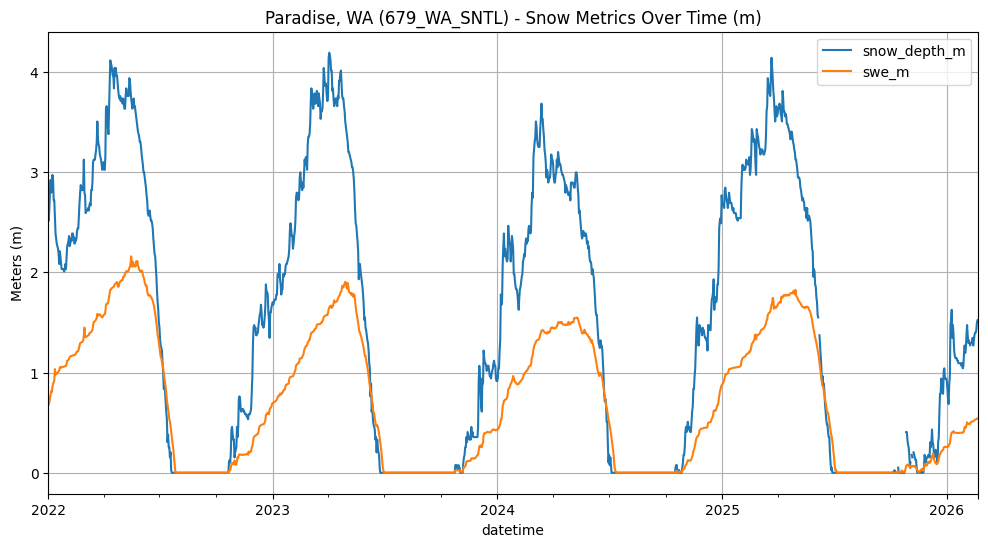

In [ ]:
ax = df.plot(
    y=["snow_depth_m", "swe_m"],
    figsize=(12, 6),
    title="Paradise, WA (679_WA_SNTL) - Snow Metrics Over Time (m)",
    grid=True,
)

ax.set_ylabel("Meters (m)")
plt.show()